In [2]:
import math

In [3]:
EPS = 1e-15
MAX_ITER = 100

In [4]:

def computeResidual(m, a, x):
    """ x^m - a"""
    return abs(x ** m - a)


def chebyshevMethod(m, a, x0, eps=EPS, maxIter=MAX_ITER, order=5):
    """
    Метод Чебышева для решения уравнения x^m - a = 0
    
    Параметры:
    m — степень
    a — число
    x0 — начальное значение
    eps — точность
    maxIter — максимальное количество итераций
    order — порядок разложения (1..5)
    
    Возвращает:
    (решение, число итераций, ошибку)
    """

    x = x0


    # if abs(a) < eps:
    #     print("a очень маленькое, сразу  0")
    #     return 0.0, 0, 0
    
    if m == 1:
        print("m=1: x=a")
        return a, 0, 0

    if order < 1 or order > 5:
        raise ValueError("order должен быть от 1 до 5")

    for iteration in range(maxIter):
        xPrev = x

        print(f"\nИтерация {iteration + 1}")
        print(f"   Текущее значение x = {x}")

        # t = 1 - a/x^m
        xPower = x ** m
        t = 1.0 - a / xPower

        print(f"   x^m = {xPower}")
        print(f"   t = 1 - a/x^m = {t}")

        # коэффициенты Чебышева
        c1 = -1.0 / m
        c2 = (1.0 - m) / (2.0 * m * m)
        c3 = -(1.0 - m) * (1.0 - 2.0 * m) / (6.0 * m * m * m)
        c4 = (1.0 - m) * (1.0 - 2.0 * m) * (1.0 - 3.0 * m) / (24.0 * m ** 4)
        c5 = -(1.0 - m) * (1.0 - 2.0 * m) * (1.0 - 3.0 * m) * (1.0 - 4.0 * m) / (120.0 * m ** 5)

        poly = 1.0

        if order >= 1:
            poly += c1 * t
        if order >= 2:
            poly += c2 * t * t
        if order >= 3:
            poly += c3 * t ** 3
        if order >= 4:
            poly += c4 * t ** 4
        if order >= 5:
            poly += c5 * t ** 5


        x = x * poly
        print(f"  значение x = {x}")

        residual = computeResidual(m, a, x)
        print(f"   Невязка = {residual}")

        if abs(residual) < eps:
            print("метод сошёлся!")
            return x, iteration + 1, 0

    print("\nметод не сошёлся за maxIter")
    return x, maxIter, -1



In [5]:

# tests = [
#     (1.1, 1), (1.1, 2), (1.1, 3), (1.1, 4), (1.1, 5),
#     (2.9, 1), (2.9, 2), (2.9, 3), (2.9, 4), (2.9, 5)
# ]


tests = [
    (1.1, 2.9)
]

for x0, order in tests:
    x, it, err = chebyshevMethod(m=6, a=32, x0=x0, order=order)
    print(f"\nрезультат для x0={x0}, order={order}:")
    print(f"   полученное значение: {x}")
    print(f"   итераций: {it}")
    print(f"   ошибка: {err}")



Итерация 1
   Текущее значение x = 1.1
   x^m = 1.7715610000000008
   t = 1 - a/x^m = -17.06316576172087
  значение x = -18.012502137653936
   Невязка = 34154180.18516108

Итерация 2
   Текущее значение x = -18.012502137653936
   x^m = 34154212.18516108
   t = 1 - a/x^m = 0.9999990630731043
  значение x = -13.759555400717181
   Невязка = 6786164.129135641

Итерация 3
   Текущее значение x = -13.759555400717181
   x^m = 6786196.129135641
   t = 1 - a/x^m = 0.9999952845453637
  значение x = -10.510791311864166
   Невязка = 1348348.5534581873

Итерация 4
   Текущее значение x = -10.510791311864166
   x^m = 1348380.5534581873
   t = 1 - a/x^m = 0.9999762678274187
  значение x = -8.029152915125337
   Невязка = 267896.1681390292

Итерация 5
   Текущее значение x = -8.029152915125337
   x^m = 267928.1681390292
   t = 1 - a/x^m = 0.9998805650028428
  значение x = -6.133673707222896
   Невязка = 53218.53981542553

Итерация 6
   Текущее значение x = -6.133673707222896
   x^m = 53250.53981542553

In [6]:
import matplotlib.pyplot as plt


Итерация 1
   Текущее значение x = 1
   x^m = 1
   t = 1 - a/x^m = -63.0
  значение x = 11.5
   Невязка = 2312996.765625

Итерация 2
   Текущее значение x = 11.5
   x^m = 2313060.765625
   t = 1 - a/x^m = 0.9999723310338616
  значение x = 9.583386365518432
   Невязка = 774601.0908670297

Итерация 3
   Текущее значение x = 9.583386365518432
   x^m = 774665.0908670297
   t = 1 - a/x^m = 0.999917383652943
  значение x = 7.986287261994353
   Невязка = 259395.49276337973

Итерация 4
   Текущее значение x = 7.986287261994353
   x^m = 259459.49276337973
   t = 1 - a/x^m = 0.9997533333649952
  значение x = 6.655567710096144
   Невязка = 86854.18249394558

Итерация 5
   Текущее значение x = 6.655567710096144
   x^m = 86918.18249394558
   t = 1 - a/x^m = 0.9992636753534917
  значение x = 5.547123201503695
   Невязка = 29070.45308962287

Итерация 6
   Текущее значение x = 5.547123201503695
   x^m = 29134.45308962287
   t = 1 - a/x^m = 0.9978032880932027
  значение x = 4.6246335731839485
   Невяз

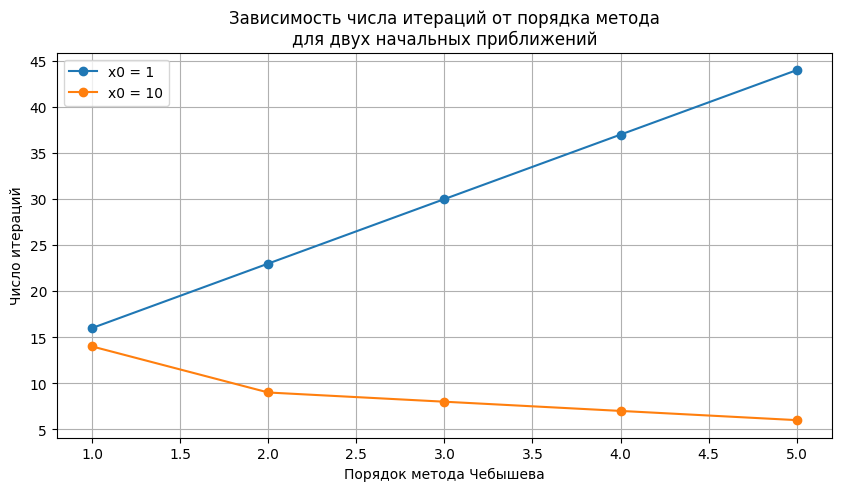

In [7]:
orders = [1, 2, 3, 4, 5]
x0_list = [1, 10]

plt.figure(figsize=(10, 5))

for idx, x0 in enumerate(x0_list):
    iterations = []
    for order in orders:
        _, it, _ = chebyshevMethod(m=6, a=64, x0=x0, order=order)
        iterations.append(it)

    plt.plot(orders, iterations, marker='o', label=f"x0 = {x0}")

plt.grid(True)
plt.xlabel("Порядок метода Чебышева")
plt.ylabel("Число итераций")
plt.title("Зависимость числа итераций от порядка метода\nдля двух начальных приближений")
plt.legend()
plt.show()